In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
path = "./files/pima-indians-diabetes.csv"
df = pd.read_csv(path, header=None)

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
columns =  ['Number of times pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)']
df.columns = columns

In [16]:
df.head(5)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(768, 9)

In [20]:
df.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class variable (0 or 1)                                                       int64
dtype: object

In [21]:
x = df.drop('Class variable (0 or 1)', axis=1)
y = df['Class variable (0 or 1)']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [39]:
random_forest = RandomForestClassifier(n_estimators=30, random_state=42)

In [40]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [41]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [42]:
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Train Accuracy:  1.0
Test Accuracy:  0.7575757575757576


In [43]:
feature_importances = pd.DataFrame({"feature": list(x.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending=False)
feature_importances

,feature,importance
1,Plasma glucose concentration a 2 hours in an o...,0.286038
5,Body mass index (weight in kg/(height in m)^2),0.162529
7,Age (years),0.141848
6,Diabetes pedigree function,0.110087
2,Diastolic blood pressure (mm Hg),0.087758
0,Number of times pregnant,0.078266
4,2-Hour serum insulin (mu U/ml),0.070376
3,Triceps skin fold thickness (mm),0.063097


C:\Users\andre\AppData\Local\Temp\ipykernel_1184\2329081662.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.feature, y=feature_importances.importance, palette='viridis', edgecolor='black', saturation=0.6)


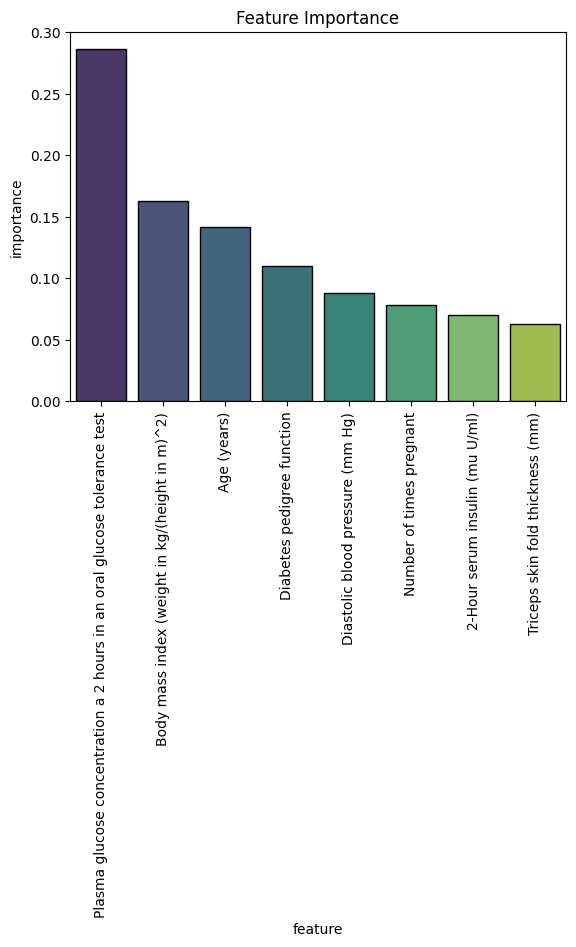

In [44]:
sns.barplot(x=feature_importances.feature, y=feature_importances.importance, palette='viridis', edgecolor='black', saturation=0.6)
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()